# Simulation of the Brownian motion

## By ZHAO Tianyuan

In [37]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import comb, perm
from time import time

We denote $\Delta T :=2^{-n} T, t_{i}^{n} :=i \Delta T, i=0, \ldots, 2^{n}$.

In [3]:
# parameters
T = 1.

## Forward simulation of $\left\{W_{t_{1}^{n}}, \ldots, W_{t_{n}^{n}}\right\}$

Given a simualtion of $\left\{W_{t_{1}^{n}}, \ldots, W_{t_{n}^{n}}\right\}$,

Justify that $W_{t_{1}^{n}}=W_{t_{i-1}^{n}}+Z_{i} \sqrt{\Delta T}$ where $\left(Z_{i}\right)_{1 \leq i \leq 2^{n}}$ is an idd family of $\mathcal{N}(0,1)$ random variables

Proof:
According to the 3rd property of the brownian motion,
$$ \frac{W_{t_i^n}- W_{t_{i-1}^n}}{\sqrt{\Delta T}} \sim \frac{\mathcal{N}(0,t_i^n- t_{i-1}^n)}{\sqrt{\Delta T}} = \mathcal{N}(0,1)
$$

According to the 2nd property of the brownian motion, for $i\neq j$
$$ W_{t_i^n}- W_{t_{i-1}^n}~\text{and}~W_{t_j^n}- W_{t_{j-1}^n}~\text{are independent}
$$

In [121]:
def ForwardBrownianMotion( n_copy, n):
    '''
    Forward simulation of n_copy samples of n_motion discretized Brownian motions
    
    Parameters:
        n (int): positive integer
        n_copy (int): number of copies in a sample
        
    Returns:
        array: (2^n+ 1) * n_copy dimensional MB samples
    '''
    tt = time()
    n_motion = 2**n+ 1
    deltaT = 2**( -n) * T
    W = np.zeros( ( n_copy, n_motion), dtype=np.float16)
    Z = (np.random.randn( n_copy, n_motion- 1)* np.sqrt( deltaT)).astype(np.float16)
    W[:,1:] = np.cumsum( Z, axis= 1)
    print('Compute time : ', time()- tt)
    return W

Compute time :  0.1350078582763672
(1000, 1025)


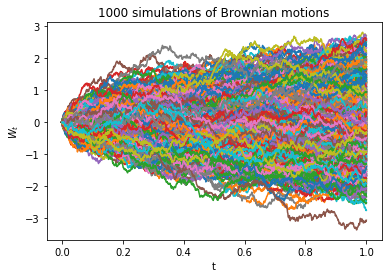

In [159]:
n_copy = 1000
n = 10
n_motion = 2**n+ 1
deltaT = 2**( -n) * T
W = ForwardBrownianMotion( n_copy, n)
print(W.shape)
plt.plot( deltaT* np.arange( n_motion), W.T)
plt.xlabel('t')
plt.ylabel('$W_t$')
plt.title('{} simulations of Brownian motions'.format( n_copy))
plt.show()

In [123]:
W_T = W[ :, -1]
W_T_2 = W[ :, 2**(n-1)]
W_cov = np.array( [W_T, W_T_2])

sample_mean = np.mean( W_T)
sample_variance = np.var( W_T, ddof=1)
sample_covariance = np.cov( W_cov)
print('Sample mean of W_T : ', sample_mean)
print('Sample variance of W_T : ', sample_variance)
print('Sample covariance of ( W_T, W_T/2) : ')
print(sample_covariance)

Sample mean of W_T :  -0.0434
Sample variance of W_T :  1.093
Sample covariance of ( W_T, W_T/2) : 
[[1.09266193 0.53318357]
 [0.53318357 0.50135309]]


In [124]:
nlist = list( range( 2, 15))
sample_mean = np.zeros( len(nlist))
sample_variance = np.zeros( len(nlist))
sample_covariance = np.zeros( len(nlist))

for i, n in enumerate( nlist):
    W = ForwardBrownianMotion( n_copy, n)
    W_T = W[ :, -1]
    W_T_2 = W[ :, 2**(n-1)]
    W_cov = np.array( [W_T, W_T_2])

    sample_mean[ i] = np.mean( W_T)
    sample_variance[ i] = np.var( W_T, ddof=1)
    sample_covariance[ i] = np.cov( W_cov)[0,1]
    print('*'*20,'n = {}'.format( n),'*'*20)
    print('Sample mean of W_T : ', sample_mean[ i])
    print('Sample variance of W_T : ', sample_variance[ i])
    print('Sample covariance of ( W_T, W_T/2) : ', sample_covariance[ i],'\n')

Compute time :  0.0009999275207519531
******************** n = 2 ********************
Sample mean of W_T :  -0.059112548828125
Sample variance of W_T :  0.9716796875
Sample covariance of ( W_T, W_T/2) :  0.48040797829392173 

Compute time :  0.002000093460083008
******************** n = 3 ********************
Sample mean of W_T :  -0.01371002197265625
Sample variance of W_T :  0.96728515625
Sample covariance of ( W_T, W_T/2) :  0.4726072579098964 

Compute time :  0.0030002593994140625
******************** n = 4 ********************
Sample mean of W_T :  -0.00933074951171875
Sample variance of W_T :  0.98681640625
Sample covariance of ( W_T, W_T/2) :  0.49899413905128487 

Compute time :  0.0030002593994140625
******************** n = 5 ********************
Sample mean of W_T :  -0.022613525390625
Sample variance of W_T :  0.99951171875
Sample covariance of ( W_T, W_T/2) :  0.5173205103816141 

Compute time :  0.006000518798828125
******************** n = 6 ********************
Sample 

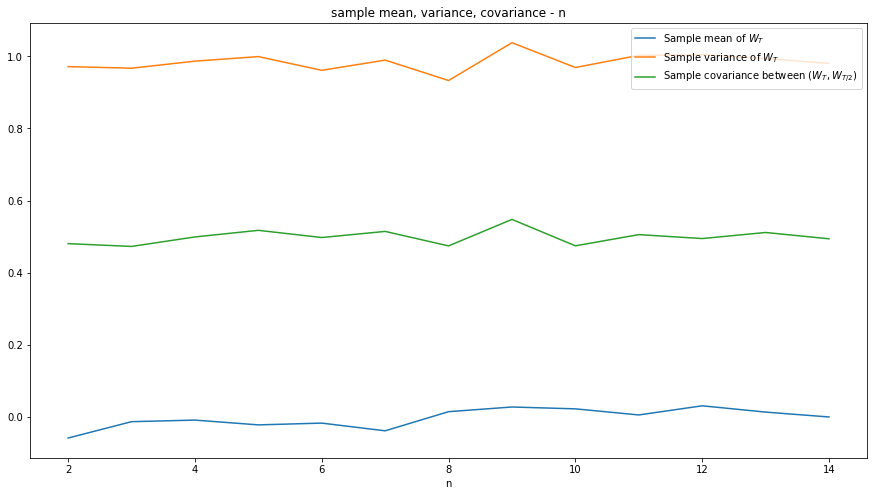

In [125]:
plt.figure(figsize=(15,8))
plt.plot( nlist, sample_mean, label='Sample mean of $W_T$')
plt.plot( nlist, sample_variance, label='Sample variance of $W_T$')
plt.plot( nlist, sample_covariance, label='Sample covariance between $(W_T,W_{T/2})$')
plt.xlabel('n')
plt.title('sample mean, variance, covariance - n')
plt.legend(loc=1)

We observe that the sample mean of $W_T$ fluctuates near value 0.0, the sample variance of $W_{T/2}$ fluctuates near value $T$, the sample covariance of $\{W_T,W_{T/2}\}$ fluctuates near value $T/2$ and that these three variables do not show a convergence behavior or an asymptotic behavior when the magnitude of $n$ increases.

## Backward simulation of $\left\{W_{t_{1}^{n}}, \ldots, W_{t_{n}^{n}}\right\}$

For $0\leq s_1<s_2$, we recall that the pair $(W_{s_1} ,W_{s_2} )$ is a centered Gaussian vector with variance matrix $\left(\begin{array}{ll}{s_{1}} & {s_{1}} \\ {s_{1}} & {s_{2}}\end{array}\right)$, and therefore $W_{s_{1}} | W_{s_{2}}$ is also Gaussian with characteristics
$$
\mathbb{E}\left[W_{s_{1}} | W_{s_{2}}\right]=\frac{s_{1}}{s_{2}} W_{s_{2}} \quad \text { and } \quad \operatorname{Var}\left[W_{s_{1}} | W_{s_{2}}\right]=s_{1}\left(1-\frac{s_{1}}{s_{2}}\right)
$$

With $\overline{s} :=\frac{s_{1}+s_{2}}{2}$, we have $\mathbf{W} = (W_{s_1},W_\overline{s},W_{s_2})^T\sim\mathcal{N}\left(\left[\begin{array}{l1}{{0} \\ {0} \\ {0}}\end{array}\right],\left[\begin{array}{ll}{s_{1}} & {s_{1}} & {s_1} \\ {s_{1}} & {\overline{s}} & {\overline{s}} \\ {s_{1}} & {\overline{s}} & {s_2}\end{array}\right]\right)$, so $W_\overline{s}|\sigma(W_{s_1},W_{s_2})$ is a gaussian variable, we separate $W_\overline{s}$ to two parts
$$ W_\overline{s} := W_\overline{s} + a_1 W_{s_1} + a_2 W_{s_2} - a_1 W_{s_1} - a_2 W_{s_2} = Z - a_1 W_{s_1} - a_2 W_{s_2}
$$

such that $Z$ is independent of $\sigma(W_{s_1},W_{s_2})$, i.e.
$$ Cov(W_\overline{s} + a_1 W_{s_1} + a_2 W_{s_2}, W_{s_1}) = s_1 + a_1 s_1 + a_2 s_1 = 0\\
   Cov(W_\overline{s} + a_1 W_{s_1} + a_2 W_{s_2}, W_{s_2}) = \overline{s} + a_1 s_1 + a_2 s_2 = 0
$$

which leads to $ a_1 = a_2 = -\frac{1}{2}$, thus
$$ W_\overline{s}|\sigma(W_{s_1},W_{s_2}) = Z|\sigma(W_{s_1},W_{s_2}) - (a_1 W_{s_1} + a_2 W_{s_2})|\sigma(W_{s_1},W_{s_2})\\
\sim Z - (a_1 W_{s_1} + a_2 W_{s_2})
$$

Note that
$$ Z = W_\overline{s} + a_1 W_{s_1} + a_2 W_{s_2} = \left(-\frac{1}{2}, 1, -\frac{1}{2}\right)\left(\begin{array}{l1}{ W_{s_1} \\ W_\overline{s} \\ W_{s_2}}\end{array}\right) = U\mathbf{W}\\
\mathbb{E}\left[ Z \right] = U\mathbb{E}\left[ W \right] = (0,0,0)^T\\
\mathbf{Var}(Z) = U\mathbf{Var}(W)U^T = \frac{s_2- s_1}{4}
$$
Thus
$$ W_\overline{s}|\sigma(W_{s_1},W_{s_2}) \sim \mathcal{N}(\frac{W_{s_1}+W_{s_2}}{2},\frac{s_2- s_1}{4})
$$

Consider $\left(W_{u}\right)_{u \notin\left[s_{1}, s_{2}\right]}$, by the continuity of $W_t$, ${W_{s_1}, W_{s_2}}$ is included in $\sigma(\left(W_{u}\right)_{u \notin\left[s_{1}, s_{2}\right]})$, meanwhile for $u \notin\left[s_{1}, s_{2}\right]$
$$ Cov(Z, W_u) = \overline{s}\land u - \frac{1}{2}s_1\land u - \frac{1}{2}s_2\land u = 0
$$

Thus
$$ W_\overline{s}|\sigma(W_{s_1},W_{s_2},\left(W_{u}\right)_{u \notin\left[s_{1}, s_{2}\right]}) = (Z - (a_1 W_{s_1} + a_2 W_{s_2}))|\sigma(W_{s_1},W_{s_2},\left(W_{u}\right)_{u \notin\left[s_{1}, s_{2}\right]}) = Z|\sigma(W_{s_1},W_{s_2}) - (a_1 W_{s_1} + a_2 W_{s_2})\\
\sim Z - (a_1 W_{s_1} + a_2 W_{s_2})\sim \mathcal{N}(\frac{W_{s_1}+W_{s_2}}{2},\frac{s_2- s_1}{4})
$$


In [207]:
def BackwardBrownianMotion( n_copy, n):
    '''
    Backward simulation of n_copy samples of n_motion discretized Brownian motions
    
    Parameters:
        n (int): positive integer
        n_copy (int): number of copies in a sample
        
    Returns:
        array, (2^n+ 1) * n_copy dimensional MB samples
    '''
    tt = time()
    nodes = np.zeros( ( n_copy, 2), dtype= np.float16)
    nodes[ :, -1] = np.random.randn( n_copy).astype(np.float16)
    deltaT = T
    for i in range( n):
        mu = (nodes[ :, :-1] + nodes[ :, 1:])/2.
        sigma = np.sqrt( deltaT)/ 2.
        new_nodes = (sigma* np.random.randn( n_copy, 2**i)+ mu).astype(np.float16)

        nodes = np.concatenate( ( nodes[ :, 0].reshape( n_copy, 1), 
                                  np.stack((new_nodes, nodes[ :, 1:]), axis=2).reshape( n_copy, -1)
                                ),
                                axis=1)

        deltaT = deltaT/ 2.
    
    print('Compute time : ', time()- tt)
    return nodes

Compute time :  0.16700959205627441
(1000, 1025)


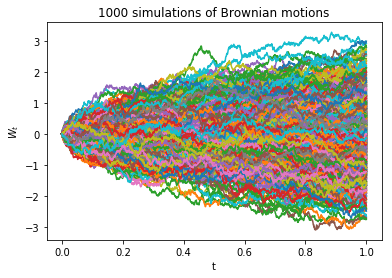

In [218]:
n_copy = 1000
n = 10
n_motion = 2**n+ 1
deltaT = 2**( -n) * T
W = BackwardBrownianMotion( n_copy, n)
print(W.shape)
plt.plot( deltaT* np.arange( n_motion), W.T)
plt.xlabel('t')
plt.ylabel('$W_t$')
plt.title('{} simulations of Brownian motions'.format( n_copy))
plt.show()

In [210]:
nlist = list( range( 2, 17))
sample_mean = np.zeros( len(nlist))
sample_variance = np.zeros( len(nlist))
sample_covariance = np.zeros( len(nlist))

for i, n in enumerate( nlist):
    W = BackwardBrownianMotion( n_copy, n)
    W_T = W[ :, -1]
    W_T_2 = W[ :, 2**(n-1)]
    W_cov = np.array( [W_T, W_T_2])

    sample_mean[ i] = np.mean( W_T)
    sample_variance[ i] = np.var( W_T, ddof=1)
    sample_covariance[ i] = np.cov( W_cov)[0,1]
    print('*'*20,'n = {}'.format( n),'*'*20)
    print('Sample mean of W_T : ', sample_mean[ i])
    print('Sample variance of W_T : ', sample_variance[ i])
    print('Sample covariance of ( W_T, W_T/2) : ', sample_covariance[ i],'\n')

Compute time :  0.0009999275207519531
******************** n = 2 ********************
Sample mean of W_T :  0.0100555419921875
Sample variance of W_T :  1.0615234375
Sample covariance of ( W_T, W_T/2) :  0.5373335840880358 

Compute time :  0.002000093460083008
******************** n = 3 ********************
Sample mean of W_T :  0.01959228515625
Sample variance of W_T :  0.939453125
Sample covariance of ( W_T, W_T/2) :  0.46741461131839557 

Compute time :  0.003000020980834961
******************** n = 4 ********************
Sample mean of W_T :  -0.003936767578125
Sample variance of W_T :  1.00390625
Sample covariance of ( W_T, W_T/2) :  0.53645585082578 

Compute time :  0.005000114440917969
******************** n = 5 ********************
Sample mean of W_T :  0.002864837646484375
Sample variance of W_T :  1.078125
Sample covariance of ( W_T, W_T/2) :  0.5220930062537577 

Compute time :  0.05500292778015137
******************** n = 6 ********************
Sample mean of W_T :  0.001

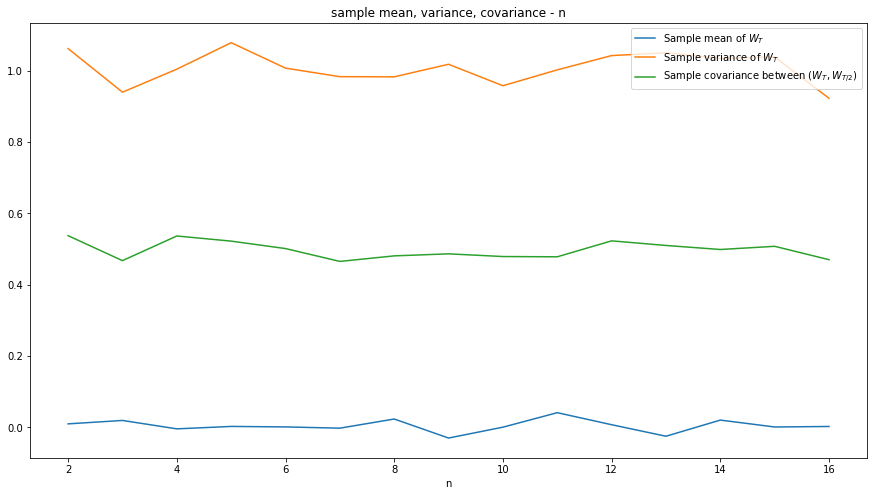

In [211]:
plt.figure(figsize=(15,8))
plt.plot( nlist, sample_mean, label='Sample mean of $W_T$')
plt.plot( nlist, sample_variance, label='Sample variance of $W_T$')
plt.plot( nlist, sample_covariance, label='Sample covariance between $(W_T,W_{T/2})$')
plt.xlabel('n')
plt.title('sample mean, variance, covariance - n')
plt.legend(loc=1)

We observe the same result as what we have observed in the forward simulation.

# Quadratic variation

In [142]:
def QuadraticVariation( W, affiche= False):
    '''
    Compute the quadratic variation given a list of samples of brownian motions, affiche the estimation and the IC
    
    Parameters:
        W (array): list of samples of brownian motions
        affiche (bool): decide whether affiche the details of the results
    
    Returns:
        array, list of quadratic variation corresponding to each sample of brownian motions
    '''
    W_difference = W[ :, 1:] - W[ :, :-1]
    Variation_samples = np.sum(W_difference**2, axis=1, dtype=np.float16)
    sample_mean = np.mean( Variation_samples)
    if affiche:
        sample_var = np.std( Variation_samples)
        RatioIC = 1.96* sample_var/ np.sqrt( n_copy)
        print('Quadratic variation : ', sample_mean)
        print('95% confidence interval: ','[ {} , {} ]'.format( sample_mean- RatioIC, sample_mean+ RatioIC))
        print('Relative error : {}%'.format( 100* RatioIC/ sample_mean), '\n')
    
    return sample_mean

In [212]:
n_copy = 1000
n = 15
print('number of samples : ', n_copy)
print('n = ', n, '\n')
# forward simulation
print('*'*20, 'Forward simulation', '*'*20)
W_forward = ForwardBrownianMotion( n_copy, n)
forward_variation = QuadraticVariation( W_forward, affiche= True)

# backward simulation
print('*'*20, 'Backward simulation', '*'*20)
W_backward = BackwardBrownianMotion( n_copy, n)
backward_variation = QuadraticVariation( W_backward, affiche= True)


number of samples :  1000
n =  15 

******************** Forward simulation ********************
Compute time :  2.624150276184082
Quadratic variation :  1.0
95% confidence interval:  [ 0.9995044272387543 , 1.0004955727612457 ]
Relative error : 0.049557276124562566% 

******************** Backward simulation ********************
Compute time :  3.2821877002716064
Quadratic variation :  1.003
95% confidence interval:  [ 1.0024251301180829 , 1.0034342448819171 ]
Relative error : 0.05030835044625834% 



In [215]:
nlist = list( range( 2, 19))
forward_variation_list = np.zeros( len(nlist))
backward_variation_list = np.zeros( len(nlist))

for i, n in enumerate( nlist):
    print('n = ', n)
    W_forward = ForwardBrownianMotion( n_copy, n)
    W_backward = BackwardBrownianMotion( n_copy, n)
    forward_variation_list[ i] = QuadraticVariation( W_forward)
    backward_variation_list[ i] = QuadraticVariation( W_backward)

n =  2
Compute time :  0.0010001659393310547
Compute time :  0.0009999275207519531
n =  3
Compute time :  0.0009999275207519531
Compute time :  0.0020003318786621094
n =  4
Compute time :  0.0009999275207519531
Compute time :  0.0030002593994140625
n =  5
Compute time :  0.002000093460083008
Compute time :  0.004000425338745117
n =  6
Compute time :  0.005000114440917969
Compute time :  0.00700068473815918
n =  7
Compute time :  0.009000539779663086
Compute time :  0.012000560760498047
n =  8
Compute time :  0.029001712799072266
Compute time :  0.031001567840576172
n =  9
Compute time :  0.05100297927856445
Compute time :  0.049002647399902344
n =  10
Compute time :  0.08800506591796875
Compute time :  0.09800577163696289
n =  11
Compute time :  0.19601130485534668
Compute time :  0.22901320457458496
n =  12
Compute time :  0.41002345085144043
Compute time :  0.463026762008667
n =  13
Compute time :  0.7590434551239014
Compute time :  1.0240585803985596
n =  14
Compute time :  1.337076

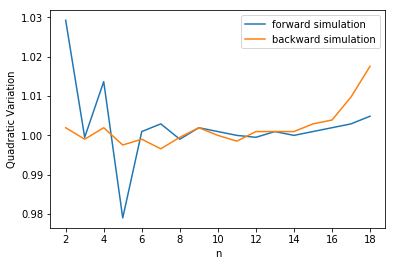

In [217]:
plt.plot( nlist, forward_variation_list, label='forward simulation')
plt.plot( nlist, backward_variation_list, label='backward simulation')
plt.xlabel('n')
plt.ylabel('Quadratic Variation')
plt.legend()

We observe that the quadratic variation of both forward and backward simulation approachs $T$.